# Deep Neural Network Model using MNIST Handwritten Digits Dataset

# MNIST Handwritten Digits Dataset
<p style='font-size:20px; line-height:30px'>The Modified National Institude of Standards and Technology (MNIST) dataset for handwritten digits is a widely used dataset which contains 60,000 handwritten digits for training a machine learning model and 10,000 handwritten digits for testing the model. It was introduced in 1998 and has become a standard benchmark for many classification tasks.</p>

# Objectives

- To develop a machine learning model using a deep neural network architecture
- Use the MNIST Handwritten dataset to train the model
- Do a perfomance analysis on the Deep Neural Network model
- Use the developed model to make predictions
- Save model and deploy

# MNIST Fashion Dataset

<h3 style="color:red">Read more on the MNIST Fashion Dataset</h3>

[Link to MNIST Fashion Dataset](https://www.tensorflow.org/datasets/catalog/fashion_mnist)


In [1]:
# Import Libraries --- [keras, sklearn, numpy, pandas, tensorflow, matplotlib]
import keras
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Load MNIST Fashion Dataset
dataset = tf.keras.datasets.mnist

In [3]:
# Slipt data into train and test part
(x_train, y_train), (x_test, y_test) =  dataset.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

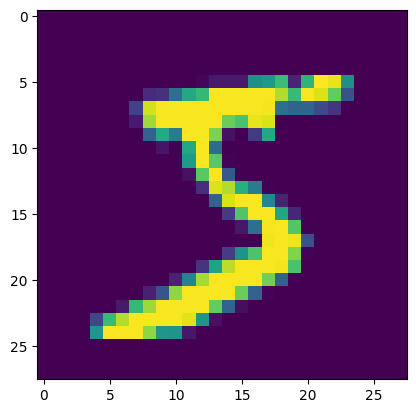

In [7]:
plt.imshow(x_train[0])

In [8]:
y_train[0]

np.uint8(5)

In [9]:
x_train[123].shape

(28, 28)

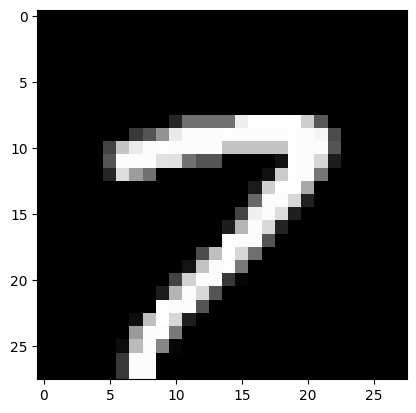

In [10]:
plt.imshow(x_train[123], cmap='gray')

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
class_labels = np.unique(y_train)

In [13]:
class_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
# scale
# lowest is 0 and highest is 1
x_train = x_train / 255.0
y_train = y_train / 255.0

# How Images are formed

### 1.  Images are formed when white light reflects off an object onto a film

![imagespec](imagespec.jpg)

### 2. The visibility range; in retrospect, is the white light range made of the 7 rainbow colours [Red, Orange, Yellow, Green, Blue, Indigo and Violet]

### 3. In a digital representation, images are basically a grid made up of a combination of colours 


![gridimage](grid.jpg)

### 4.  Each grid is a pixel made up of colours [ Note: a combination of the primary colours can generate any other colour]

![gridimage2](pixel.jpg)

### 5.  In Computer Vision, the RGB (Red, Green, Blue) colour ratio is used

### 6.  Each pixel is a combination of the intensity of the RGB ratio ranging from 0 - 255

### 7.  Colours in terms of RGB ratio 
- RED =    (255, 0, 0)
- GREEN =  (0, 255, 0)
- BLUE =   (0, 0, 255)
- YELLOW = (255, 255, 0)
- BLACK = (0, 0, 0)
- WHITE = (255, 255, 255)

In [15]:
# Build Deep Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

Convolutional layers produce 3D feature maps (height × width × channels), but fully connected (Dense) layers require 1D inputs. Flatten reshapes the tensor without changing its data.

In [16]:
# Check Model Summary
model = Sequential()

In [17]:
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu')) #128 neurons
model.add(Dense(64, activation='relu')) #64 neurons
model.add(Dense(32, activation='relu')) #32 neurons
model.add(Dense(10, activation='softmax')) #10 neurons or outputs

C:\Users\Lenovo\miniconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.get_weights()[0].shape

(784, 128)

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])

In [22]:
model.fit(x_train, y_train, epochs=7)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.0982 - loss: 0.0401
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0981 - loss: 1.0751e-06
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0976 - loss: 1.5058e-07
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.0995 - loss: 4.7606e-08
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0989 - loss: 1.4252e-08
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.0995 - loss: 4.3728e-09
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.0983 - loss: 1.5353e-09


In [23]:
# Check Final Weights
model.history.history

{'accuracy': [0.0986500009894371,
  0.09871666878461838,
  0.09871666878461838,
  0.09871666878461838,
  0.09871666878461838,
  0.09871666878461838,
  0.09871666878461838],
 'loss': [0.006099864840507507,
  7.6635467394226e-07,
  1.3105605489727168e-07,
  3.4055450015557653e-08,
  1.0963177032863314e-08,
  3.820646021779339e-09,
  1.4801798675634359e-09]}

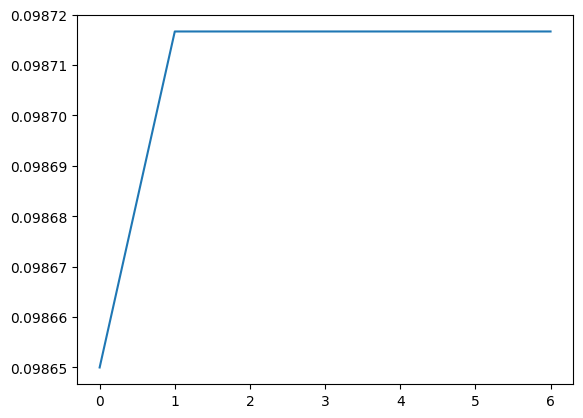

In [24]:
# Plot Accuracy and Loss
plt.plot(model.history.history['accuracy'])
plt.show()

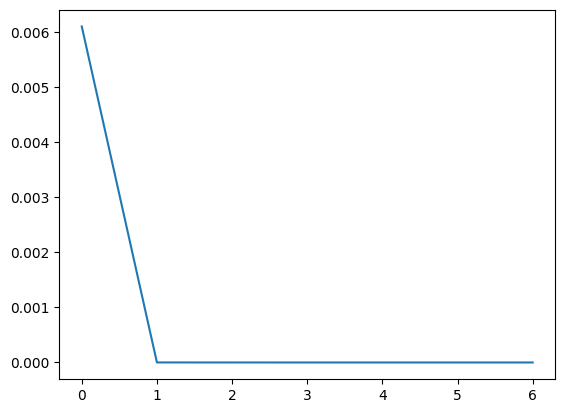

In [25]:
# Evaluate Model
plt.plot(model.history.history['loss'])
plt.show()

In [26]:
# Make Predictions with Test Part of Dataset
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0924 - loss: 10772.1611


[11308.20703125, 0.09799999743700027]

In [27]:
myprediction = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [28]:
myprediction[500]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [30]:
for i in range(0, len(myprediction[500])):
    prediction = myprediction[500][i]
    print(f'{class_labels[i]} - {prediction:.5%}')

0 - 100.00000%
1 - 0.00000%
2 - 0.00000%
3 - 0.00000%
4 - 0.00000%
5 - 0.00000%
6 - 0.00000%
7 - 0.00000%
8 - 0.00000%
9 - 0.00000%


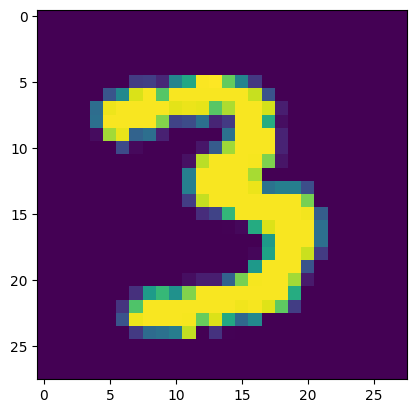

In [31]:
plt.imshow(x_test[500])

In [32]:
model.save('savedmodel.h5')